I can't write poetry, I can't paint a picture.  But I can configure matrix transformations to replicate Conway's game of life and seed a starting state to show you why I love you.

In [43]:
import numpy as np

def life_step(X):
    from scipy.signal import convolve2d
    nbrs_count = convolve2d(X, np.ones((3, 3)), mode='same', boundary='wrap') - X
    return (nbrs_count == 3) | (X & (nbrs_count == 2))


In [44]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [45]:
from JSAnimation.IPython_display import display_animation, anim_to_html
from matplotlib import animation

def life_animation(X, dpi=10, frames=10, interval=300, mode='loop'):

    X = np.asarray(X)
    assert X.ndim == 2
    X = X.astype(bool)
    
    X_blank = np.zeros_like(X)
    figsize = (X.shape[1] * 1. / dpi, X.shape[0] * 1. / dpi)

    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
    im = ax.imshow(X, cmap=plt.cm.binary, interpolation='nearest')
    im.set_clim(-0.05, 1)  # Make background gray

    # initialization function: plot the background of each frame
    def init():
        im.set_data(X_blank)
        return (im,)

    # animation function.  This is called sequentially
    def animate(i):
        im.set_data(animate.X)
        animate.X = life_step(animate.X)
        return (im,)
    animate.X = X

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=frames, interval=interval)
    
    #print anim_to_html(anim)
    return display_animation(anim, default_mode=mode)


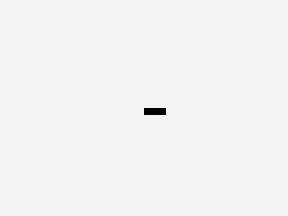
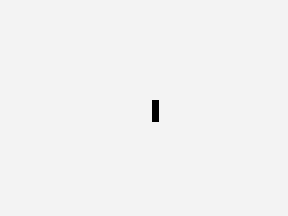
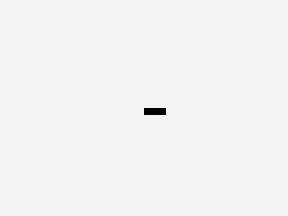
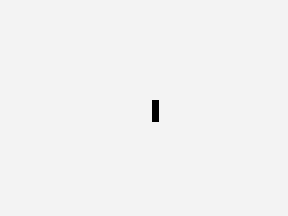
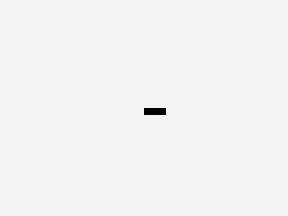
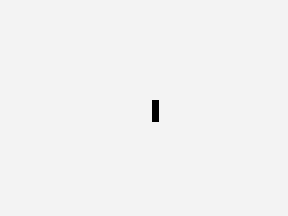
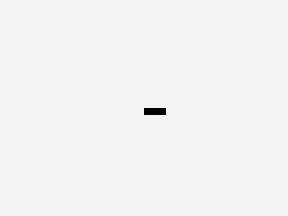
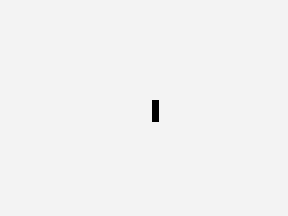
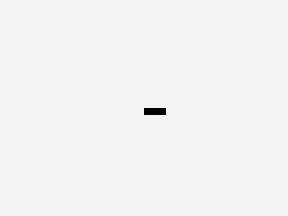
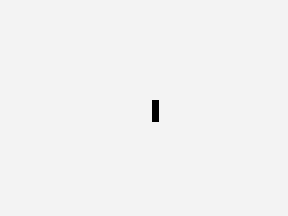
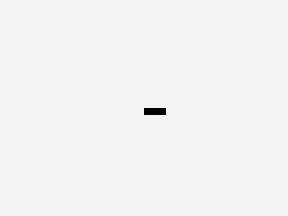
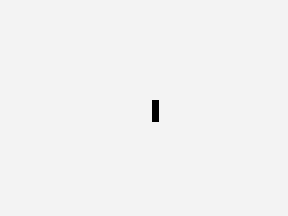
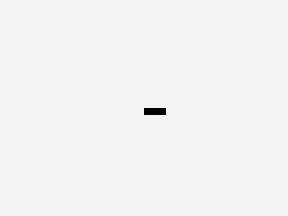
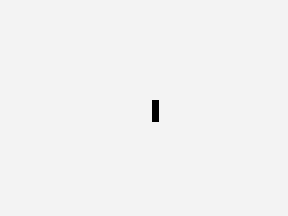
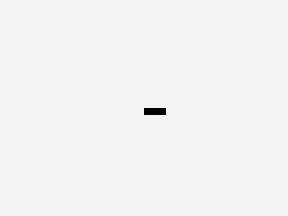
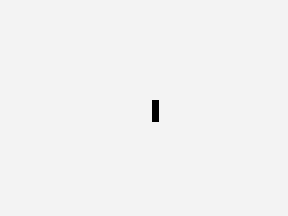
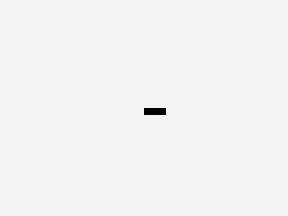
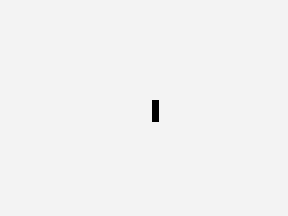
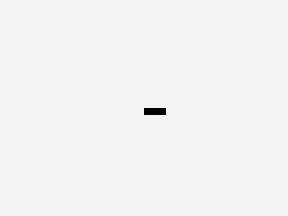
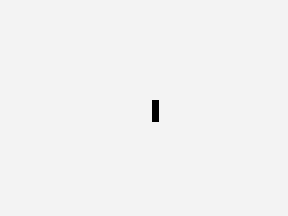
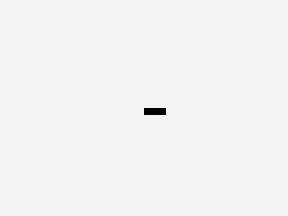
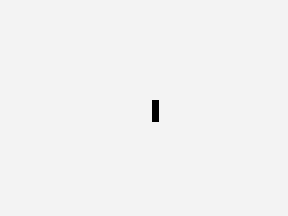
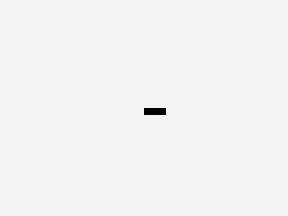
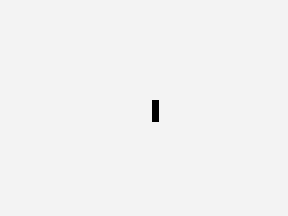
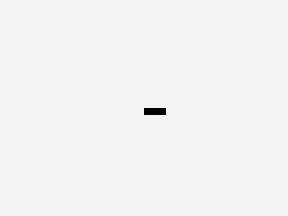
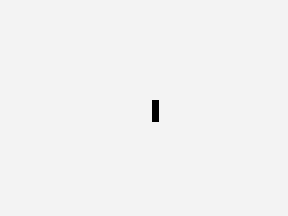
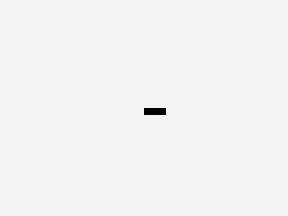
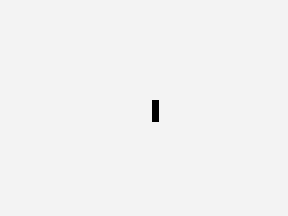
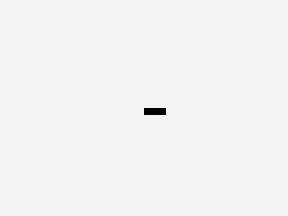
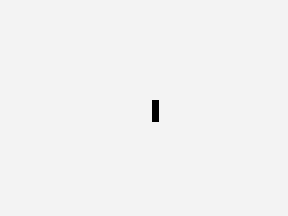
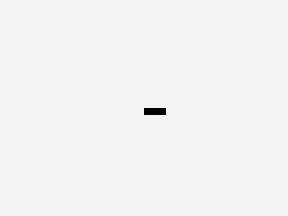
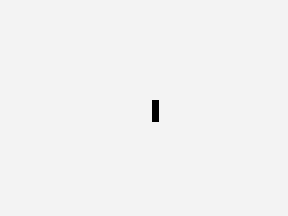
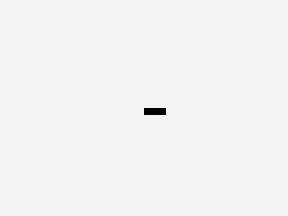
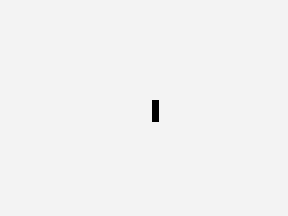
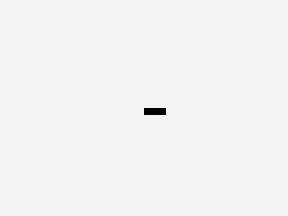
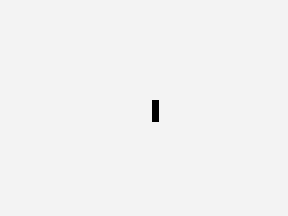
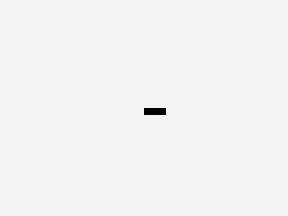
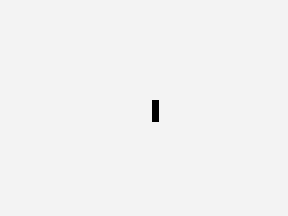
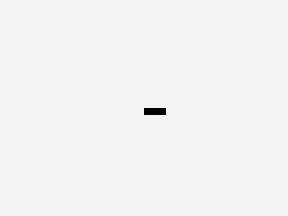
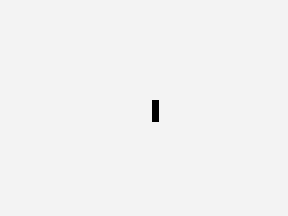
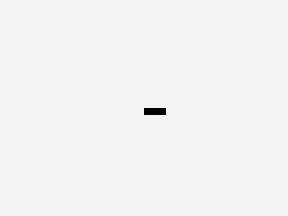
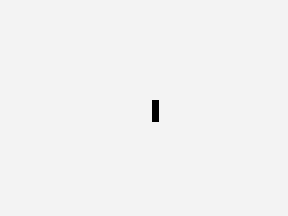
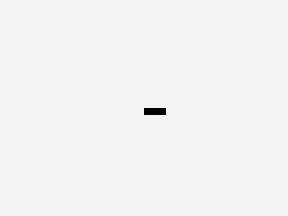
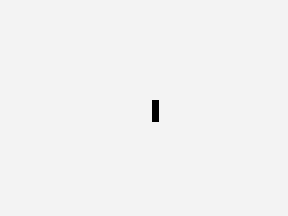
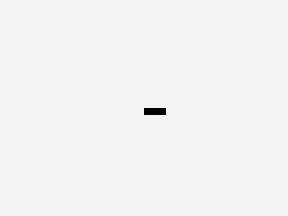
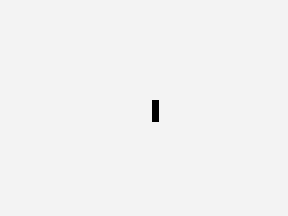
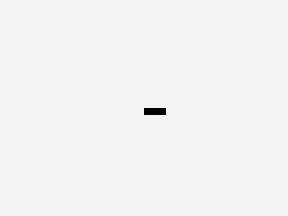
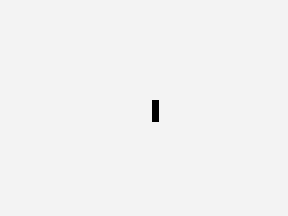
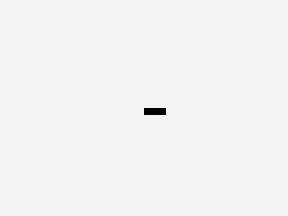
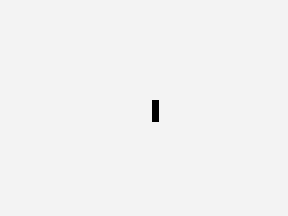
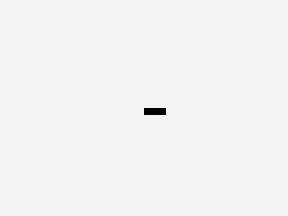
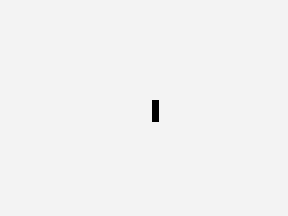
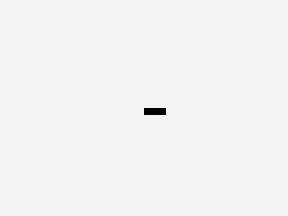
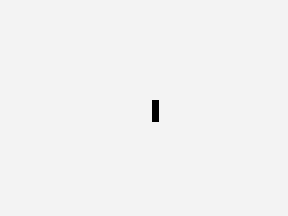
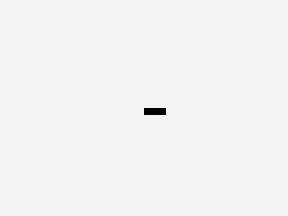
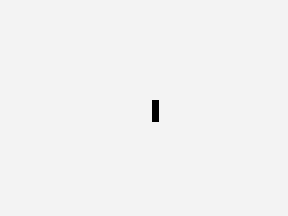
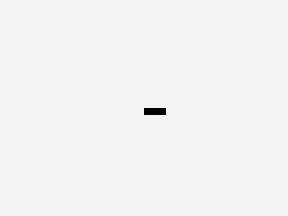
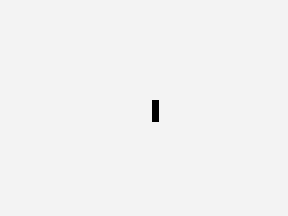
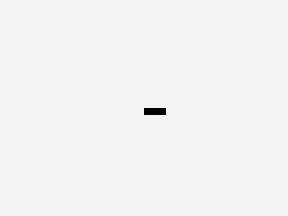
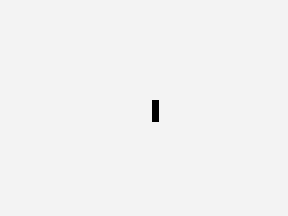
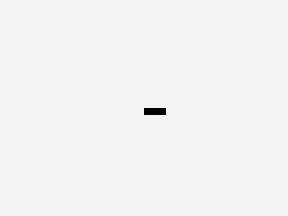
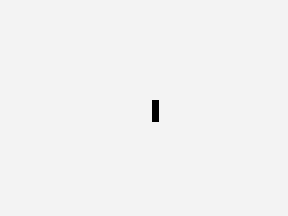
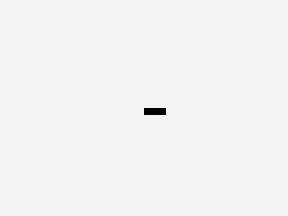
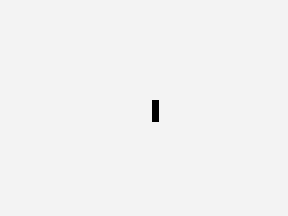
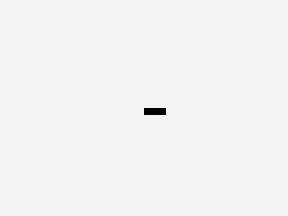
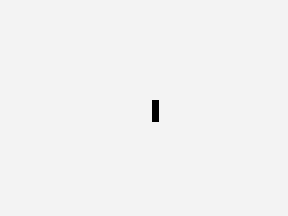
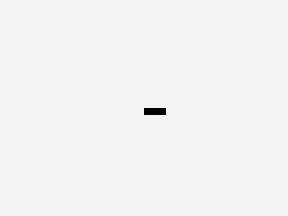
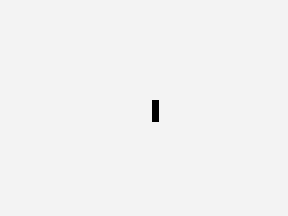
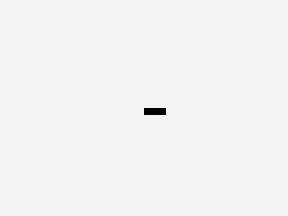
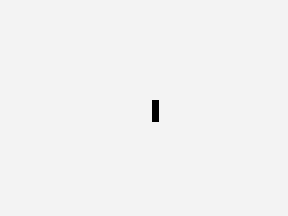
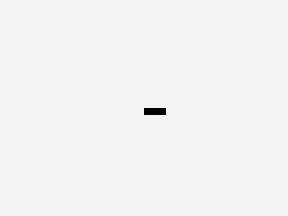
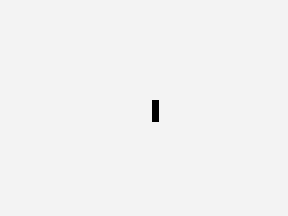
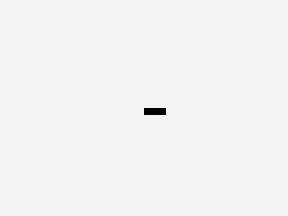
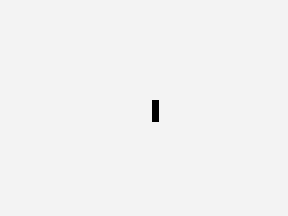
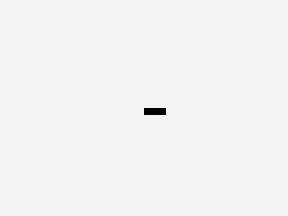
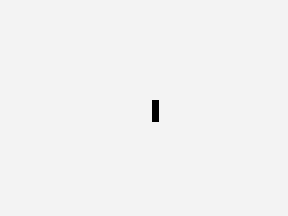
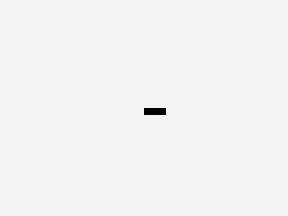
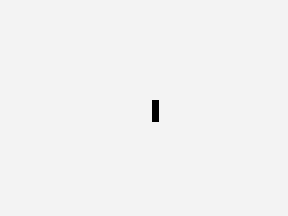
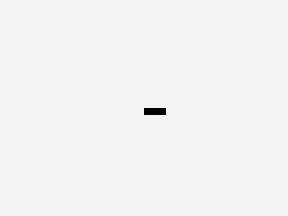
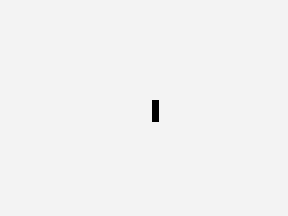
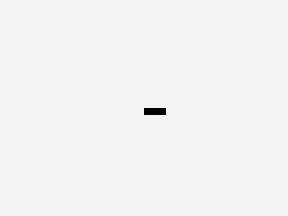
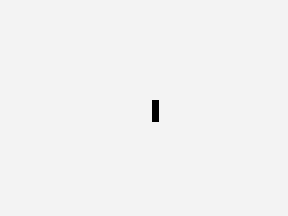
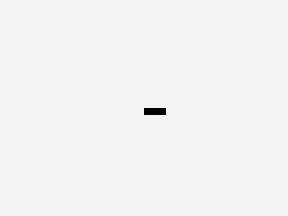
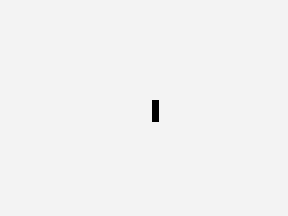
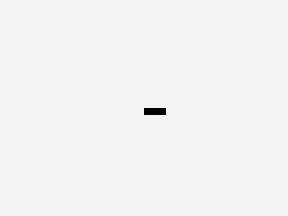
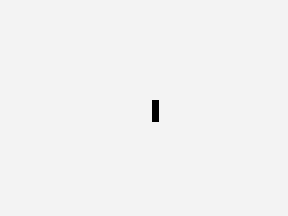
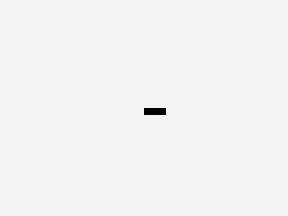
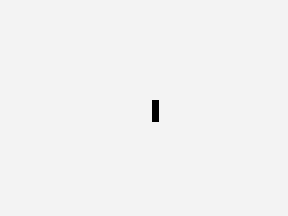
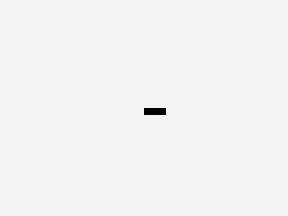
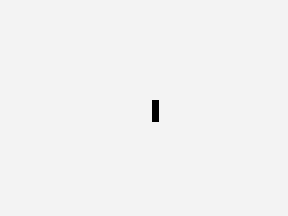
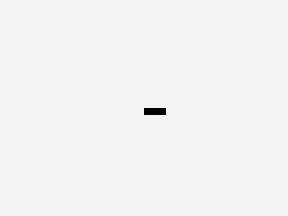
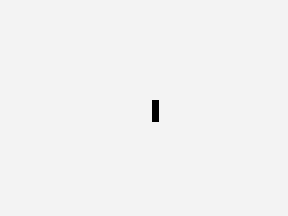
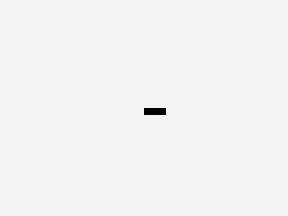
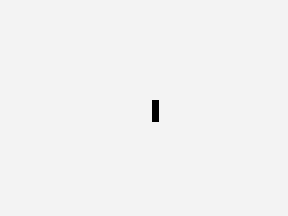
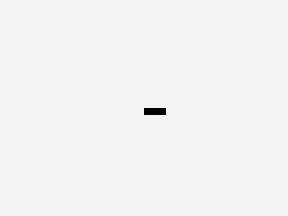
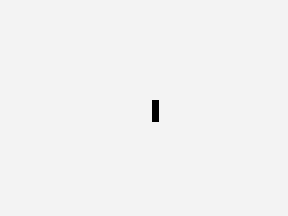
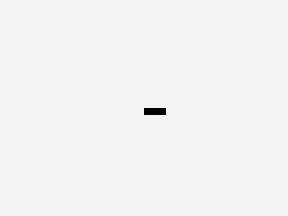
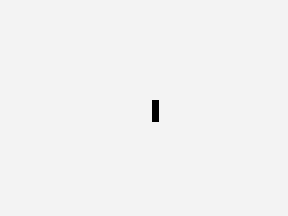
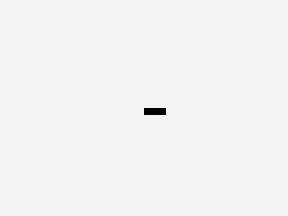
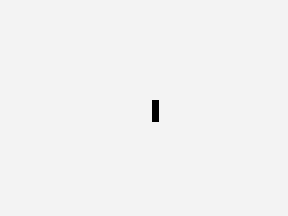

In [46]:
me = [[0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0],
      [0, 0, 1, 1, 1]]
X = np.zeros((30, 40))
X[11:16, 18:23] = me
life_animation(X, dpi=10, frames=100, interval=200, mode='once')


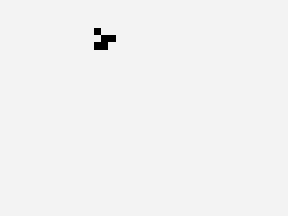
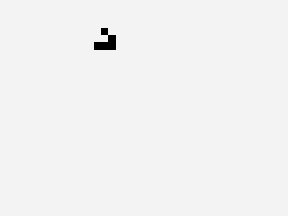
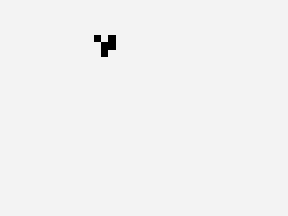
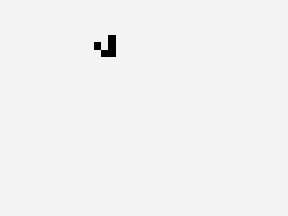
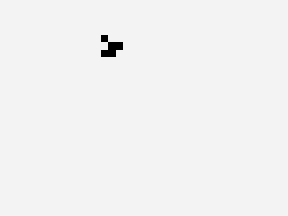
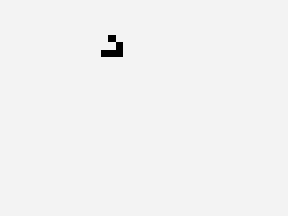
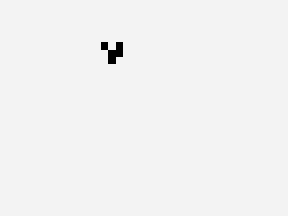
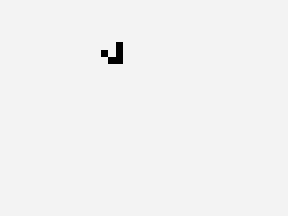
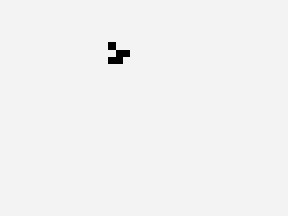
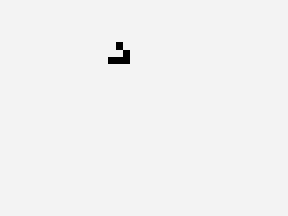
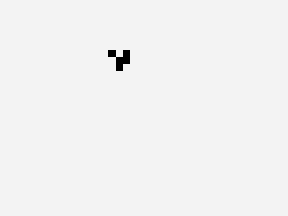
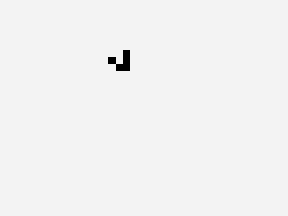
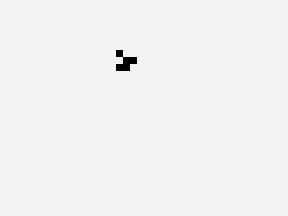
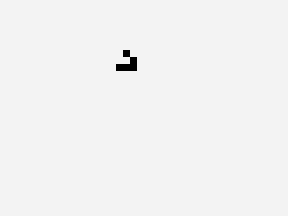
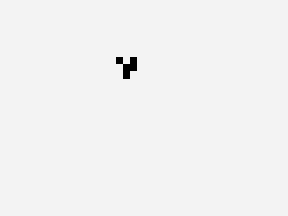
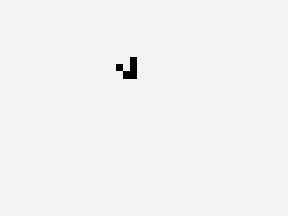
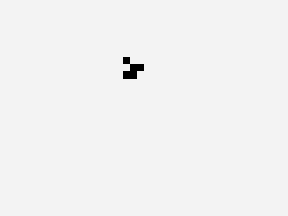
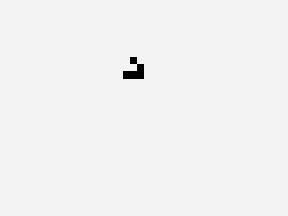
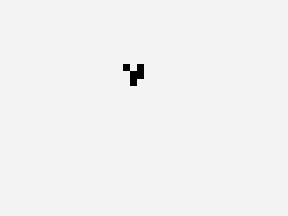
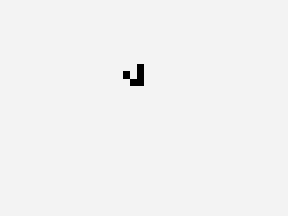
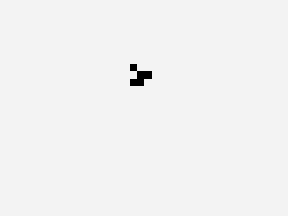
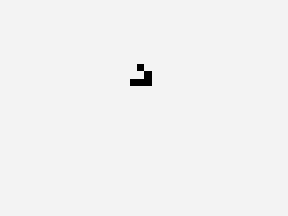
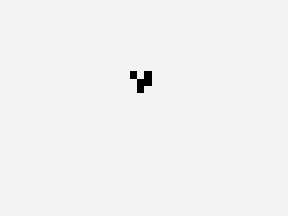
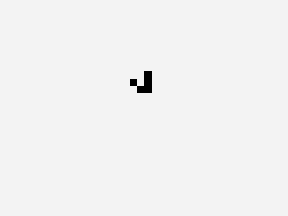
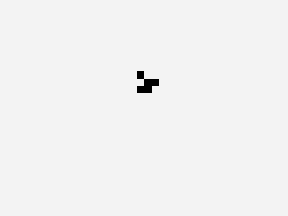
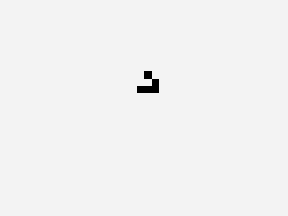
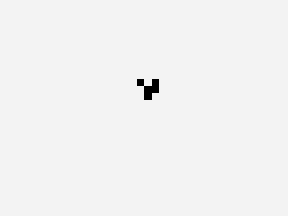
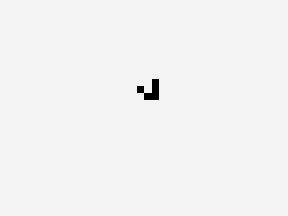
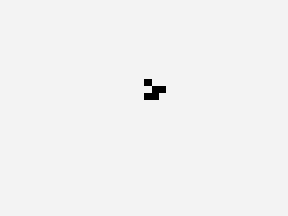
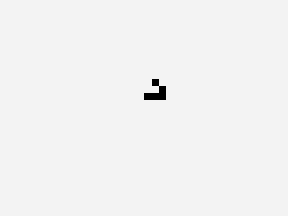
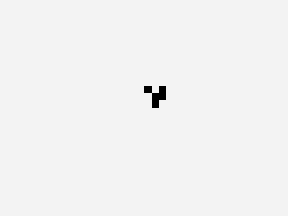
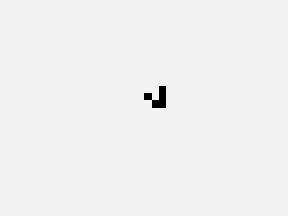
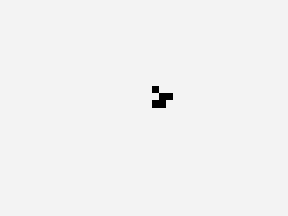
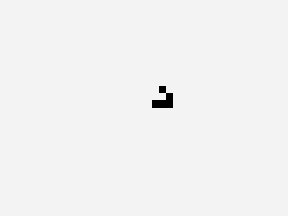
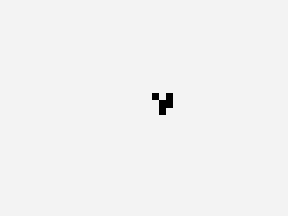
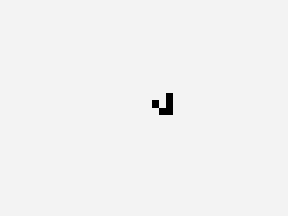
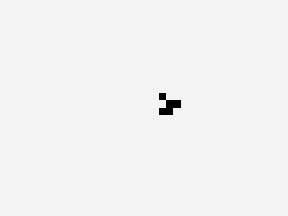
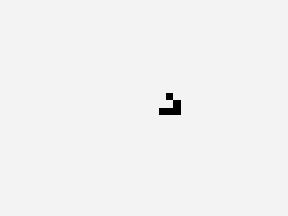
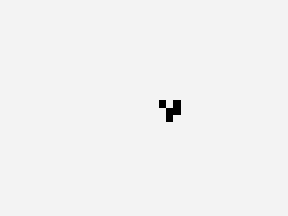
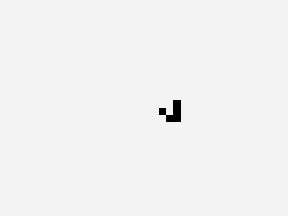
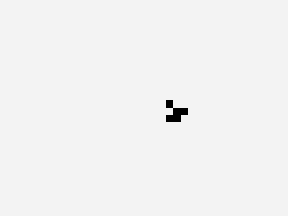
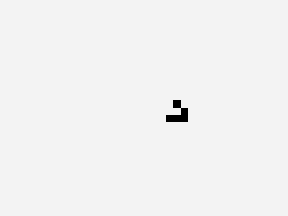
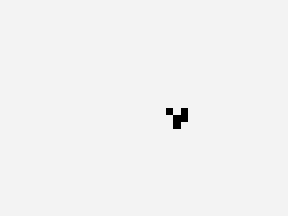
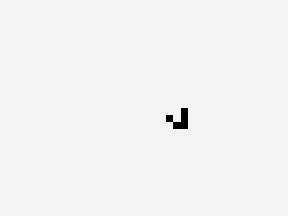
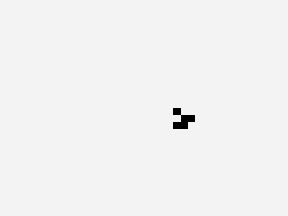
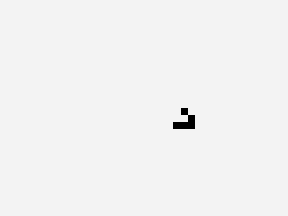
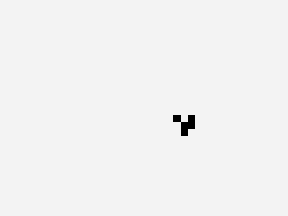
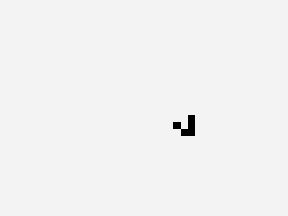
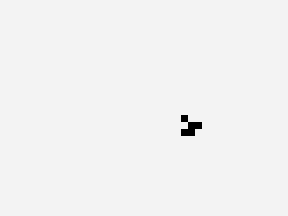
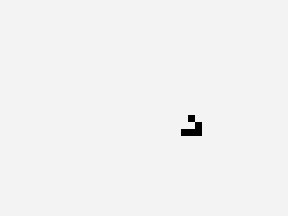
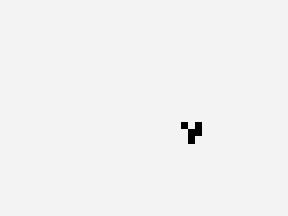
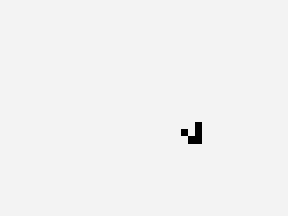
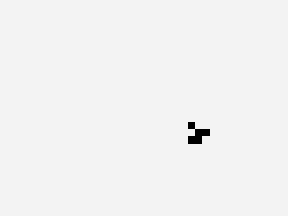
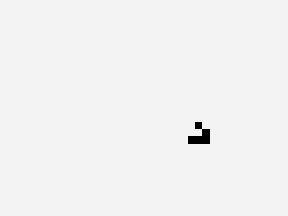
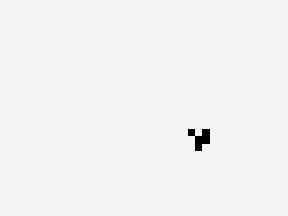
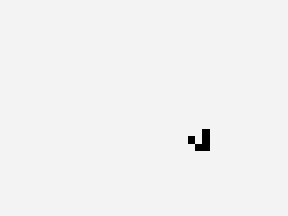
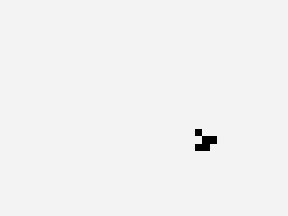
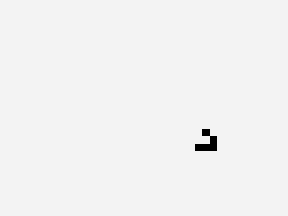
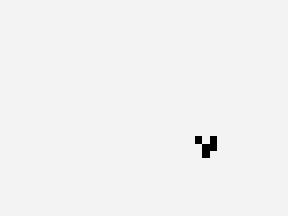
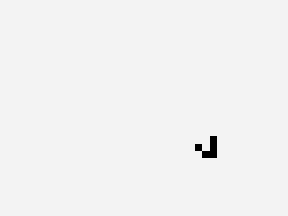
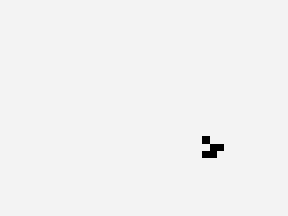
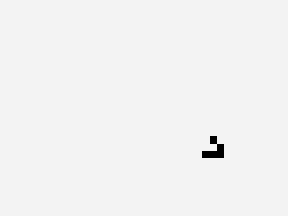
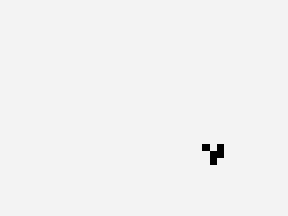
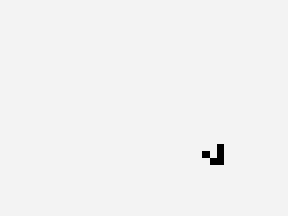
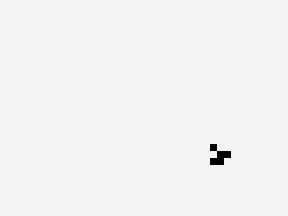
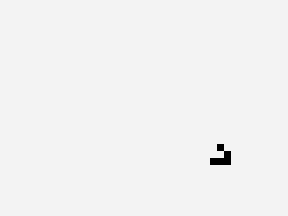
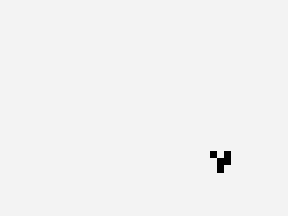
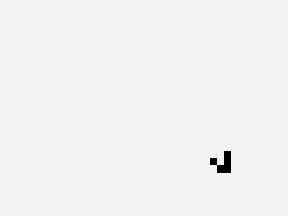
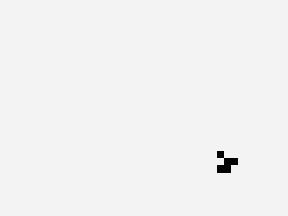
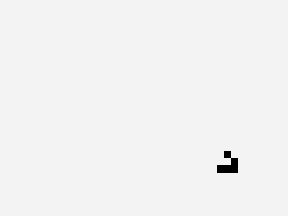
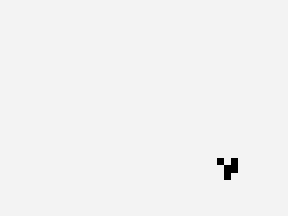
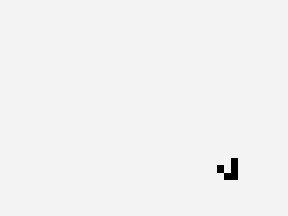
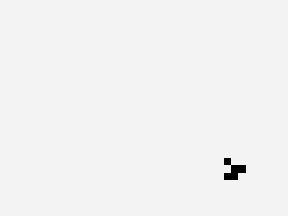
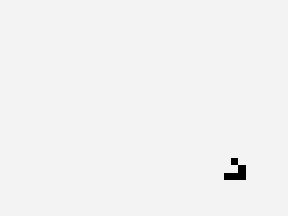
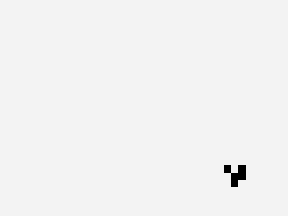
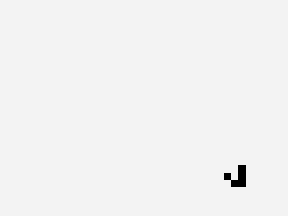
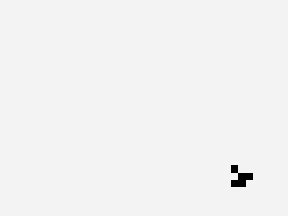
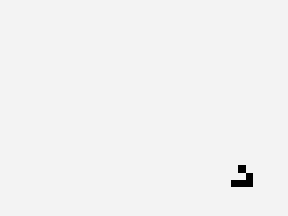
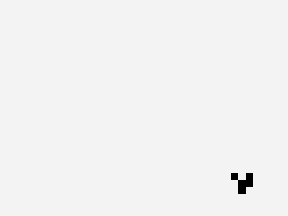
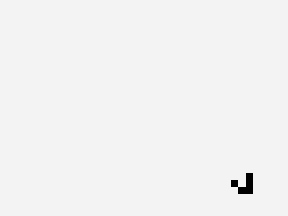
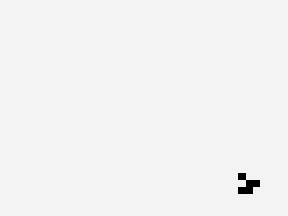
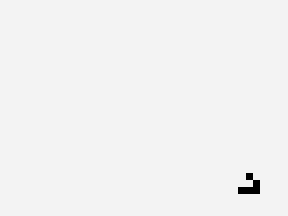
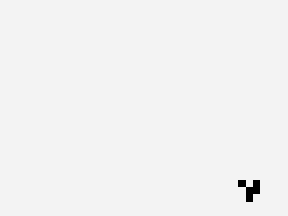
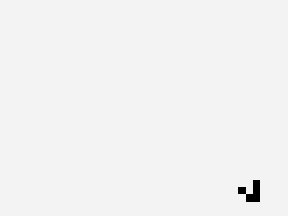
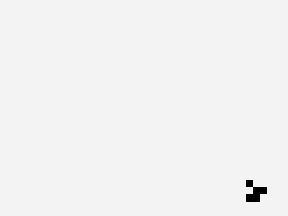
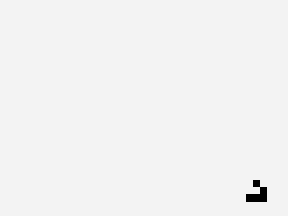
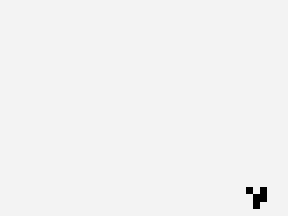
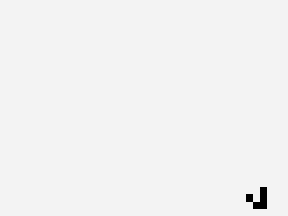
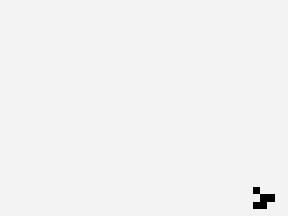
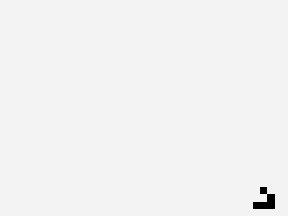
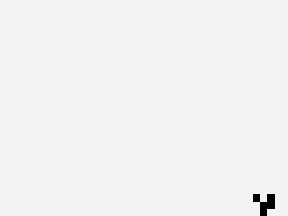
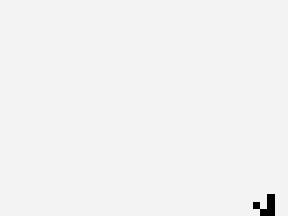
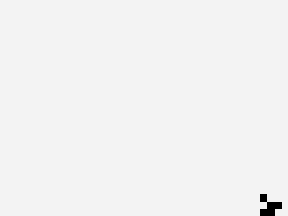
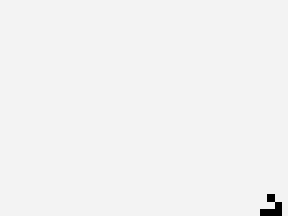
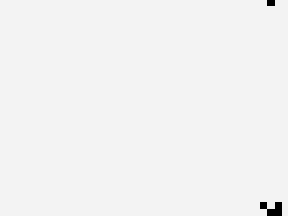
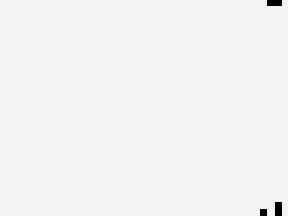
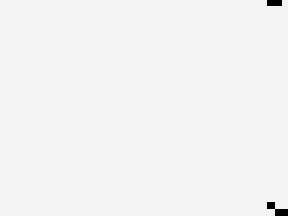
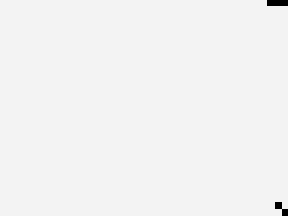
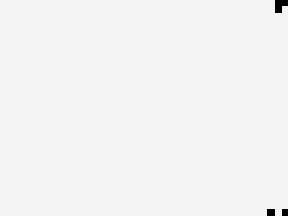
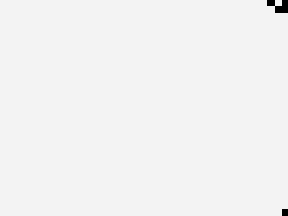

In [47]:
you = [[1, 0, 0],
      [0, 1, 1],
      [1, 1, 0]]
X = np.zeros((30, 40))
X[4:7, 13:16] = you
life_animation(X, dpi=10, frames=100, interval=200, mode='once')


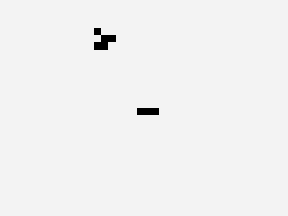
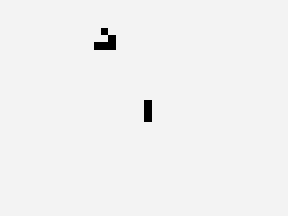
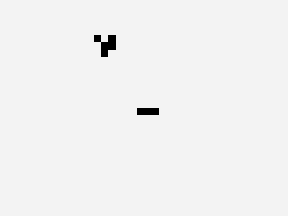
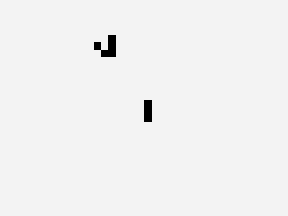
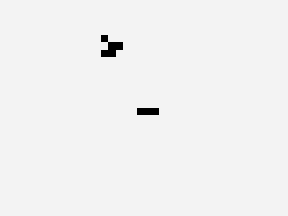
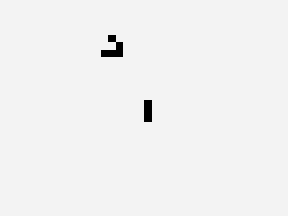
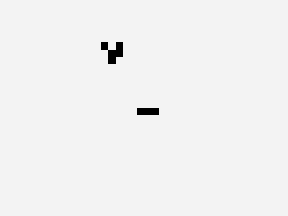
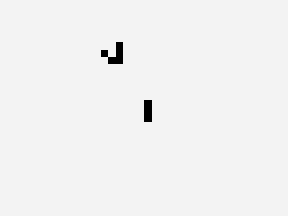
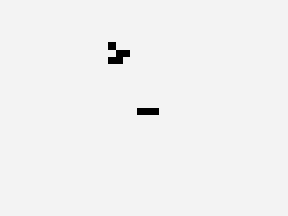
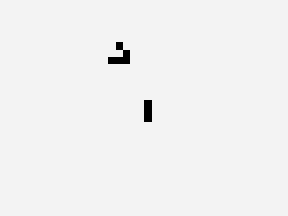
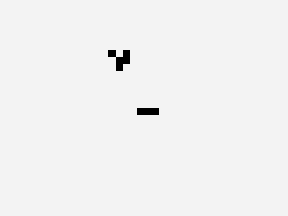
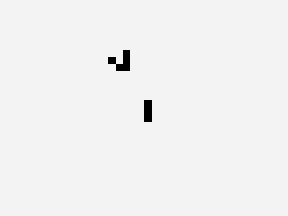
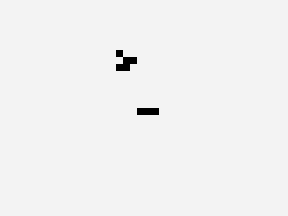
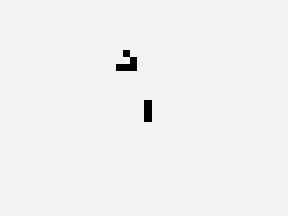
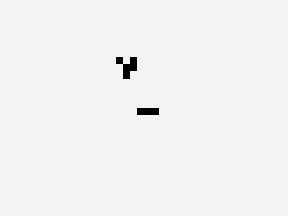
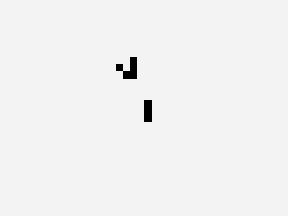
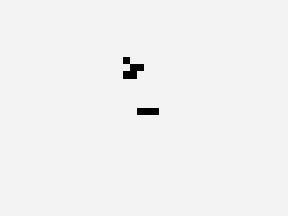
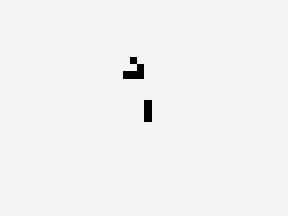
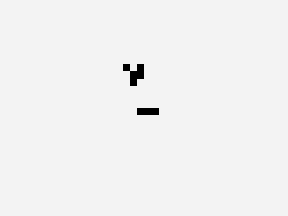
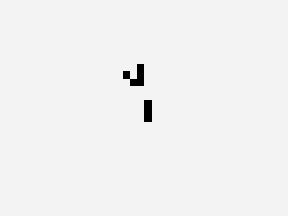
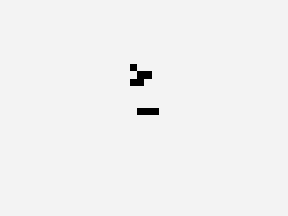
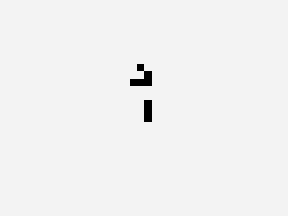
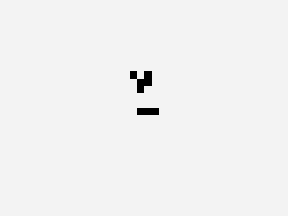
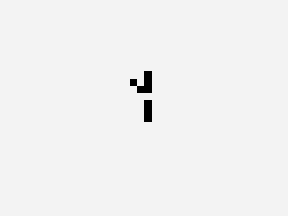
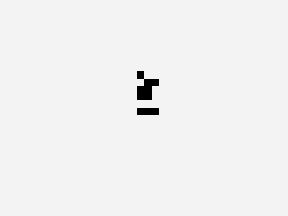
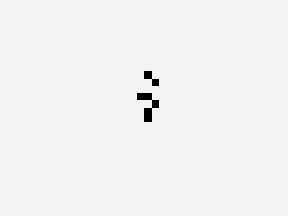
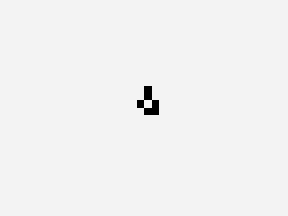
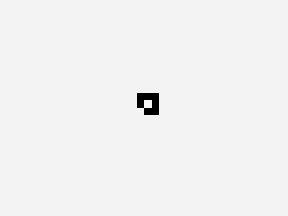
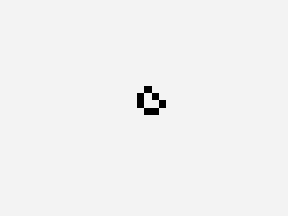
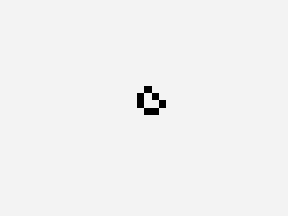
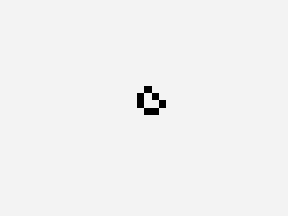
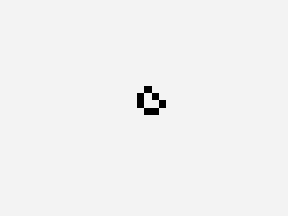
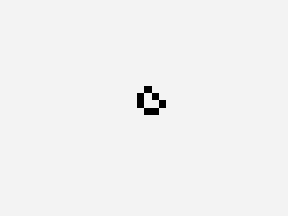
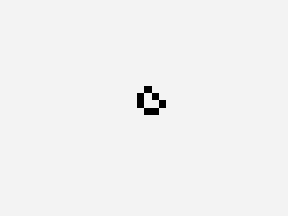
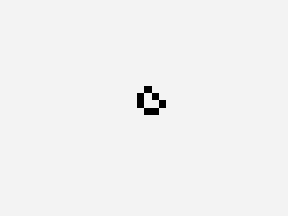
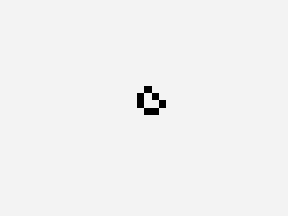
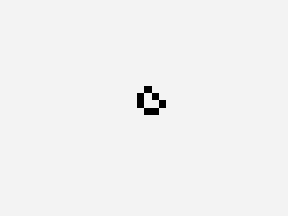
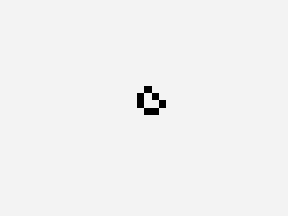
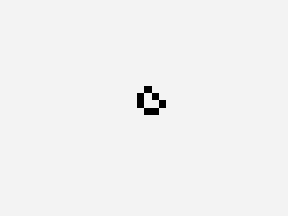
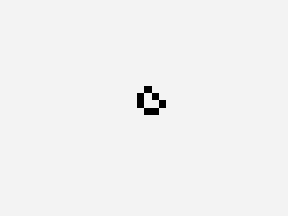
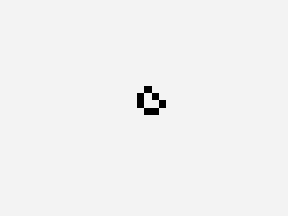
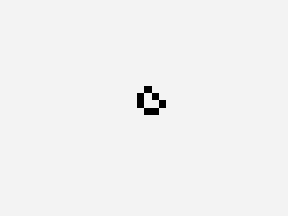
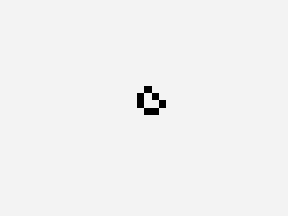
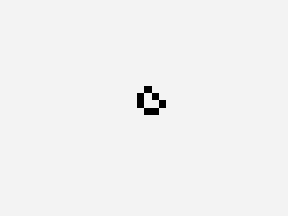
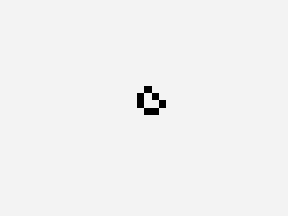
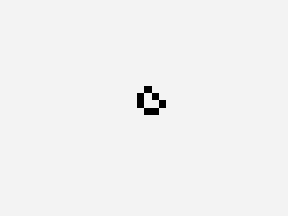
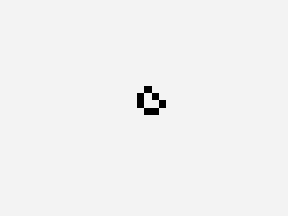
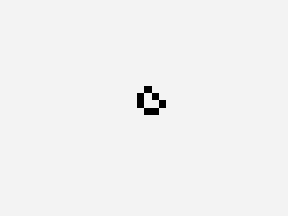
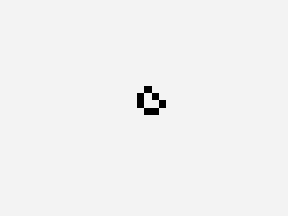
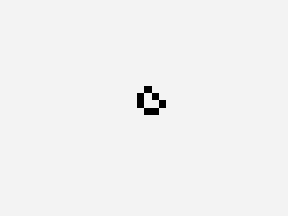
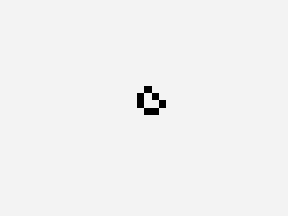
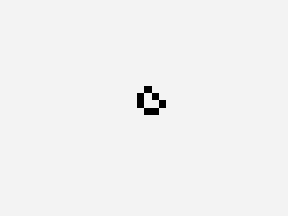
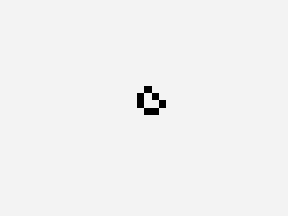
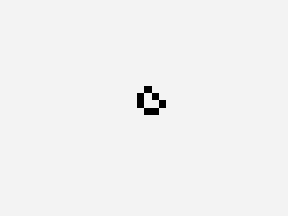
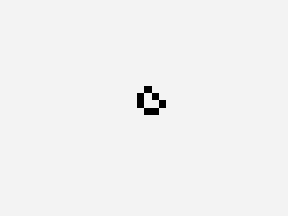
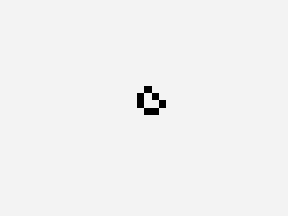
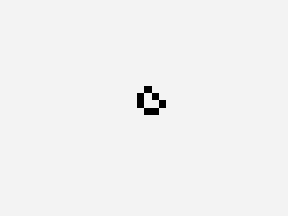
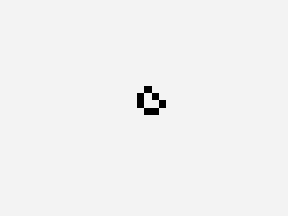
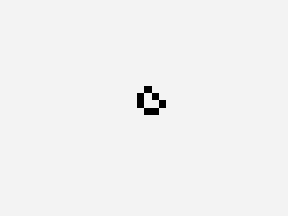
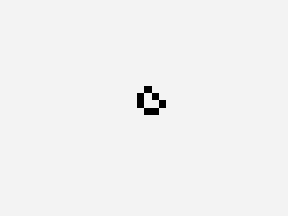
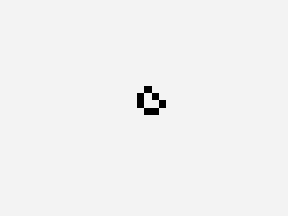
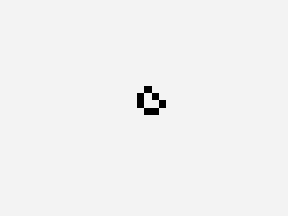
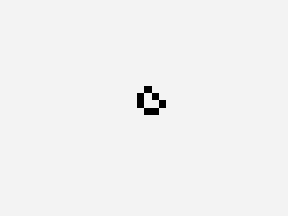
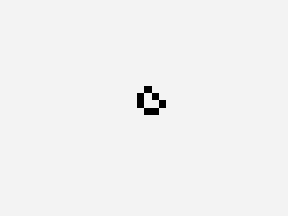
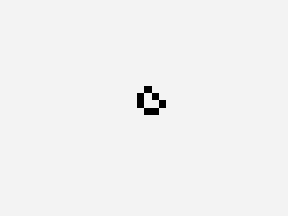
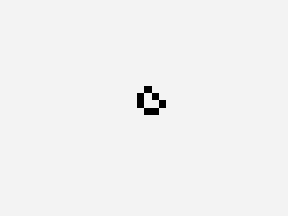
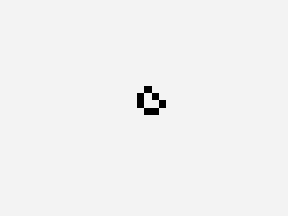
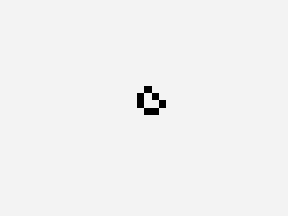
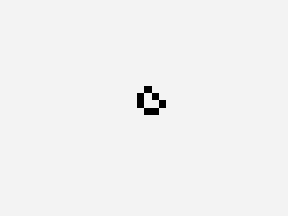
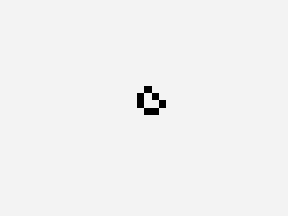
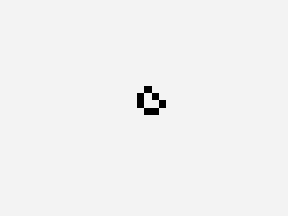
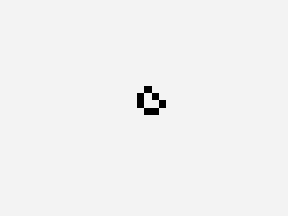
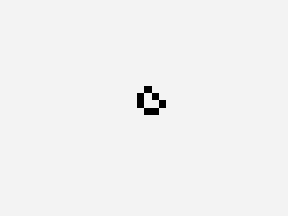
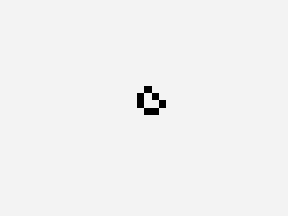
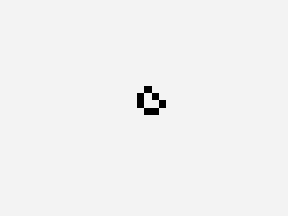
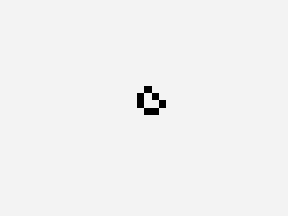
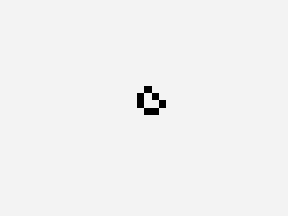
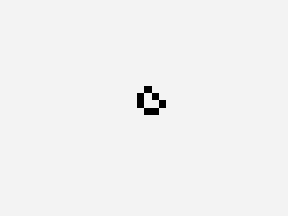
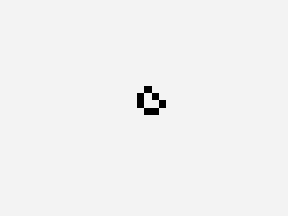
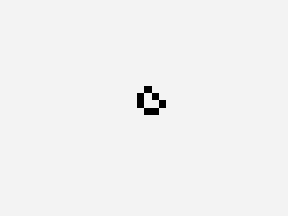
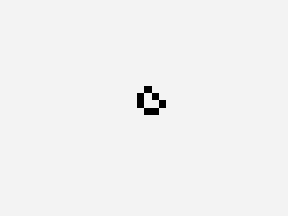
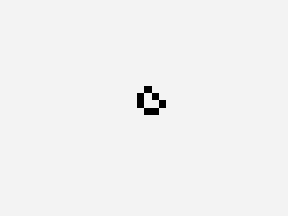
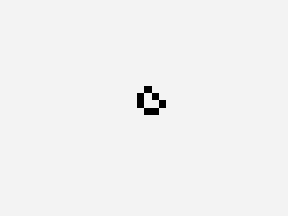
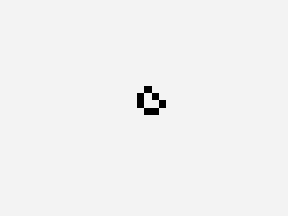
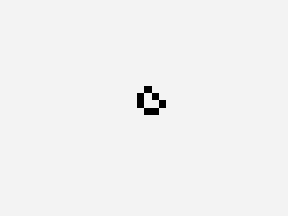
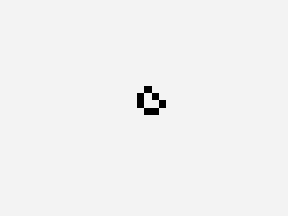
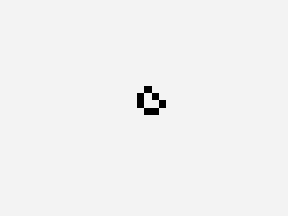
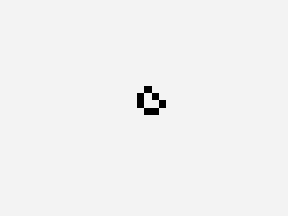
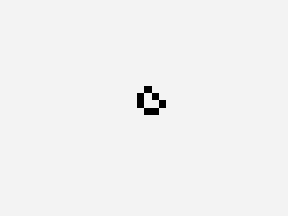
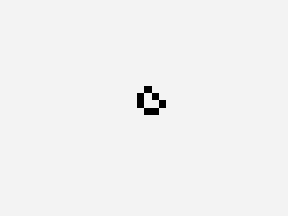
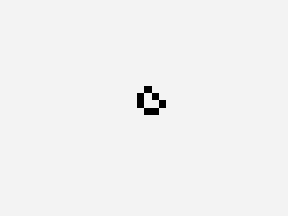
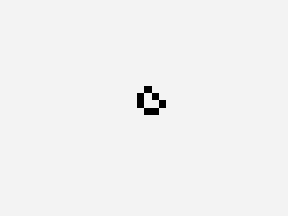
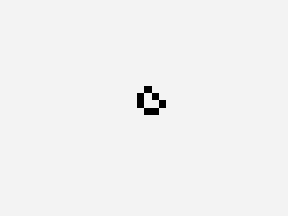
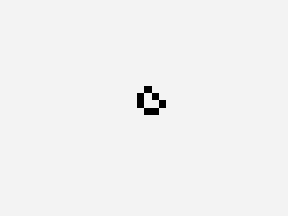
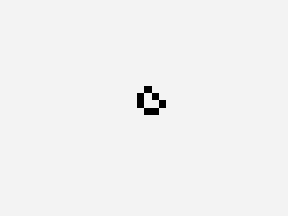
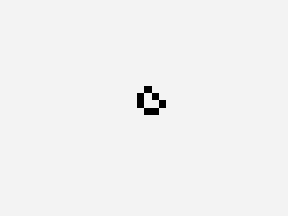
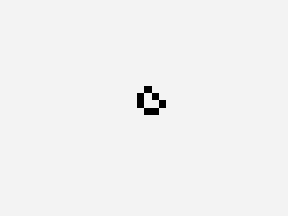
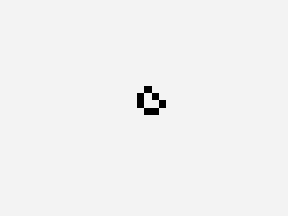
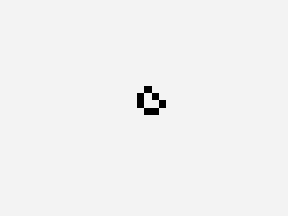
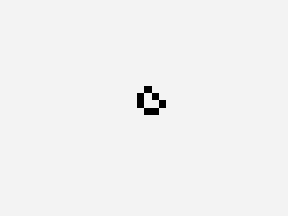

In [48]:
you = [[1, 0, 0],
      [0, 1, 1],
      [1, 1, 0]]
me = [[0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0],
      [0, 1, 1, 1, 0]]
X = np.zeros((30, 40))
X[4:7, 13:16] = you
X[11:16, 18:23] = me
life_animation(X, dpi=10, frames=100, interval=200, mode='once')